#Section 1:Derivatives (Single Variable)

- A **derivative** measures the rate at which a function changes at a point.  
- Geometrically, it’s the **slope of the tangent line** to the curve at that point.

- **Definition**:  
  If f(x) is a function, then the derivative at point x is:

  $$
  f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
  $$

- - **Examples**:

  $$
  f(x) = x^2 \Rightarrow f'(x) = 2x
  $$

  $$
  f(x) = \sin x \Rightarrow f'(x) = \cos x
  $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Defining function
def f(x):
    return x**2

def df(x):
    return 2*x

In [2]:
# Creates an array of 400 evenly spaced values between -10 and 10.
x = np.linspace(-10, 10, 400)

# Evaluates the function at above 400 values
y = f(x)

# Calculates the derivative
dy = df(x)

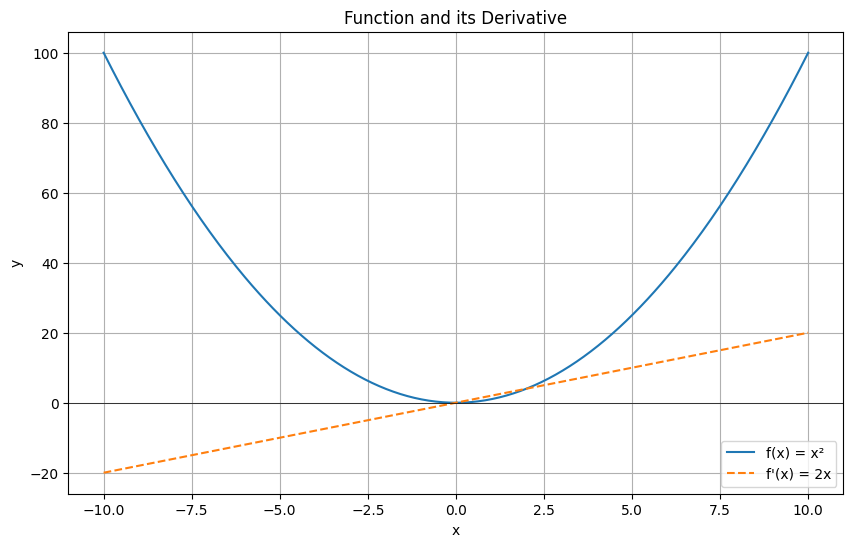

In [3]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = x²")
plt.plot(x, dy, label="f'(x) = 2x", linestyle='--')
plt.title("Function and its Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', lw=0.5)
plt.legend()
plt.grid(True)
plt.show()

## 📈Understanding the graph (My Explanation)

We’re working with a simple single-variable function:

$$
f(x) = x^2
$$

This graph helps us **understand what a derivative really means**.

---

###The Blue Curve

- This is the plot of the function \( f(x) = x^2 \).
- It's a smooth upward-opening parabola.
- The height of the curve at any point \( x \) is \( x^2 \).

---

###The Red Line (Tangent)

- This line touches the curve at exactly one point — it's called the **tangent**.
- It represents the **slope (derivative)** of the function at that specific point.
- For example, at \( x = 2 \), the slope is \( f'(2) = 2*2 = 4 \).

---

###What This Means

- The **derivative** tells us how fast the function is changing at a point.
- If the slope is positive, the function is increasing.
- If the slope is negative, the function is decreasing.
- If the slope is zero, it's a flat spot (like a minimum or maximum).

---

###Takeaway

This graph shows how the **tangent line** represents the **instantaneous rate of change** — which is exactly what the **derivative** means.

# Section 2: Partial Derivatives (Multivariable Calculus)

- In functions with more than one input variable, a **partial derivative** shows how the function changes as one variable changes, while keeping the others constant.
-For a function $f(x, y)$, the partial derivatives are:

$$
\frac{\partial f}{\partial x}, \quad \frac{\partial f}{\partial y}
$$

These represent the rate of change of $f$ with respect to $x$ and $y$, respectively.

**Example**:  
Let’s say:

$$
f(x, y) = x^2 + y^2
$$

Then:

$$
\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 2y
$$


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function and its partial derivatives
def f(x, y):
    return x**2 + y**2

def dfx(x, y):
    return 2 * x

def dfy(x, y):
    return 2 * y

In [5]:
# Creating a meshgrid
x = np.linspace(-5, 5, 40)
y = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
DX = dfx(X, Y)
DY = dfy(X, Y)

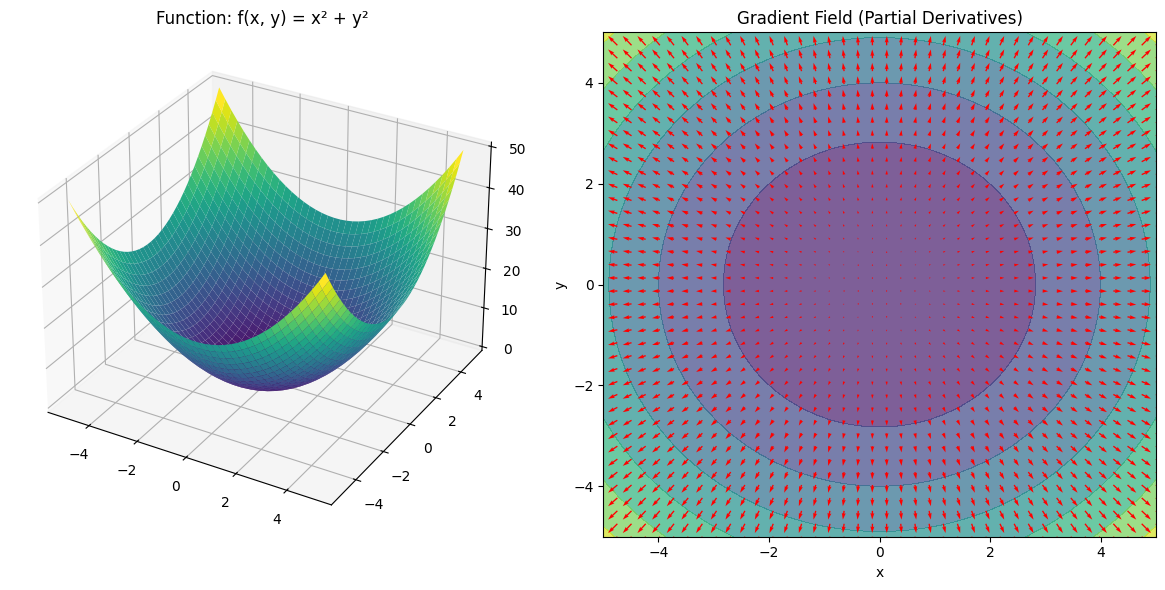

In [6]:
# Plot the surface
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title("Function: f(x, y) = x² + y²")
# Plot the partial derivatives (vector field)
ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z, cmap='viridis', alpha=0.7)
ax2.quiver(X, Y, DX, DY, color='red')
ax2.set_title("Gradient Field (Partial Derivatives)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.tight_layout()
plt.show()

## Understanding the Graphs (My Explanation)

We’re working with this multivariable function:
$$
f(x, y) = x^2 + y^2
$$

It’s a **bowl-shaped surface** (a paraboloid), and the lowest point is at the origin (0, 0). Let’s break down what each of the two graphs show:

###Left Side: 3D Surface Plot

```python
ax1.plot_surface(X, Y, Z, cmap='viridis')
```
- This plot shows the full shape of the function as a surface.
- It rises smoothly in all directions from the center (0, 0).
- You can think of it like a hill or a bowl — the lowest point is right in the middle.
- This helps us visualize the height of the function at each point (x,y).

###Right Side: Contour Plot + Gradient Arrows

```python
ax2.contourf(X, Y, Z, cmap='viridis')
ax2.quiver(X, Y, DX, DY, color='red')
```

- This is a **top-down view** of the same function — like looking at a map.
- The **contour lines** are levels of equal height (like an elevation map).
- The **red arrows** are **gradient vectors** — they point in the direction of **steepest ascent**.

Here, the gradient is:

$$
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = (2x, 2y)
$$

So, at the point \( (1, 2) \), the gradient is:

$$
\nabla f(1, 2) = (2, 4)
$$

That’s why all the arrows point away from the center — they show how the function **increases fastest**.



# Section 3: Chain Rule

- The chain rule is one of the most powerful tools in calculus, especially in **machine learning**, where we deal with **complex, nested functions**.
- Definition
  - Suppose we have a function like this:

$$
y = f(g(x))
$$

This means **one function inside another** — a **composition**.
    
  - To find the derivative of \( y \) with respect to \( x \), we use the **chain rule**:

$$
\frac{dy}{dx} = f'(g(x)) \cdot g'(x)
$$

- How It Works

  - First, **differentiate the outer function** \( f \), treating \( g(x) \) as the input.
  - Then, **multiply by the derivative of the inner function** \( g(x) \).

- Why It’s Important

  - The chain rule allows us to **break down complicated expressions** into manageable parts. This is essential in:
    * Neural networks (backpropagation),
    * Gradient descent,
    * Optimization problems,
    * Any system with **nested functions**.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 400)
#defining a function f(x) = sin(x²) using a lambda function
f = lambda x: np.sin(x**2)
#defining the derivative of f(x) using the chain rule.
df = lambda x: np.cos(x**2) * 2 * x

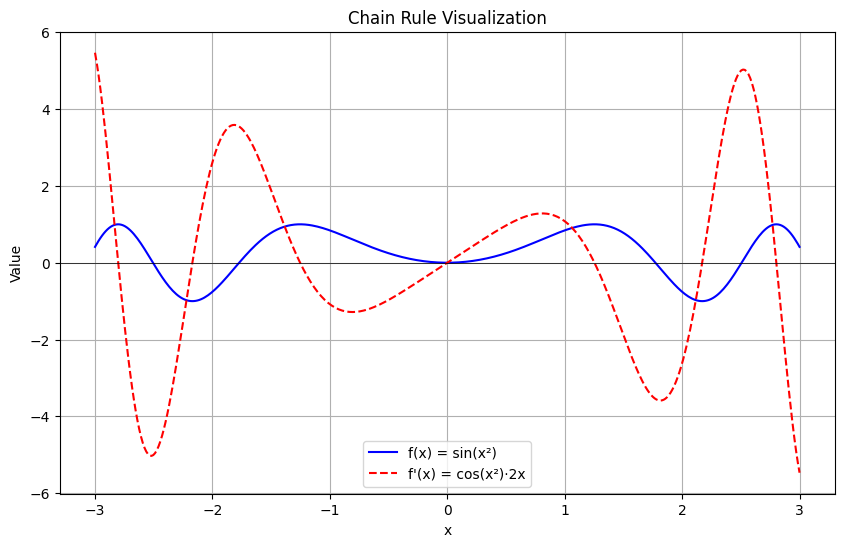

In [8]:
#Plot
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x) = sin(x²)', color='blue')
plt.plot(x, df(x), label="f'(x) = cos(x²)·2x", color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Chain Rule Visualization")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

##Understanding the Graph

In this graph, we are plotting two curves:

- **Blue Line** → This is the original function  
  $$
  f(x) = \sin(x^2)
  $$

- **Red Dashed Line** → This is the derivative  
  $$
  f'(x) = \cos(x^2) \cdot 2x
  $$

###**What’s Happening in the Blue Line?**

The function sin(x^2) is like the regular sine wave, but instead of repeating at regular intervals, it starts waving **faster as \( x \) increases**, since \( x^2 \) grows more quickly than \( x \).

- Near \( x = 0 \), the waves are **slow and smooth**.
- As we move away from 0 (left or right), the waves get **tighter and faster**.
- So you’ll see more **oscillations** as you go toward the edges of the graph.

###**What’s Happening in the Red Line?**

This is the **derivative** — which means it shows how fast the blue line is changing (its **slope**).

- When the red line is **above 0**, it means the blue curve is **increasing**.
- When the red line is **below 0**, the blue curve is **decreasing**.
- When the red line **crosses 0**, it means the blue curve is at a **peak or valley**.

Also, the red curve gets **bigger** as we move away from 0 because of the \( 2x \) multiplier — the **slope is steeper** farther from the center.

###**Summary**

- **Blue Line** = the actual function
- **Red Dashed Line** = the **slope** of the function at every \( x \)

Together, they help us understand **how the function behaves and how it changes**.


#Section 4: Gradient Vectors & Visualization

## What is a Gradient?

If a function has multiple inputs (e.g., f(x, y)), the **gradient** is a vector that tells us:

- The **direction** in which the function increases the fastest  
- The **magnitude** or **steepness** of that increase

### Mathematically

- For a function \( f(x, y) \), the gradient is:

$$
\nabla f(x, y) = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right]
$$

- This means:  
  - Take the **partial derivatives** with respect to each variable.

### Summary

- The **gradient** points in the direction of steepest ascent.
- Its **length** tells you how quickly the function is increasing in that direction.
- In machine learning and optimization, it helps us move toward the **minimum** or **maximum** of a function effectively.


##Visual Intuition

  - The gradient vector points in the steepest direction of increase of the function.

  - Its magnitude represents how steep that increase is.

  - On a 3D surface, it tells you which direction to walk to go uphill the fastest.

  - On a 2D contour map, the gradient is perpendicular to the contour lines.



In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the function
f = lambda x, y: x**2 + y**2

# Creating a grid of points
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

In [11]:
# Computing function values
Z = f(X, Y)

# Computing partial derivatives (gradient components)
df_dx = 2 * X
df_dy = 2 * Y

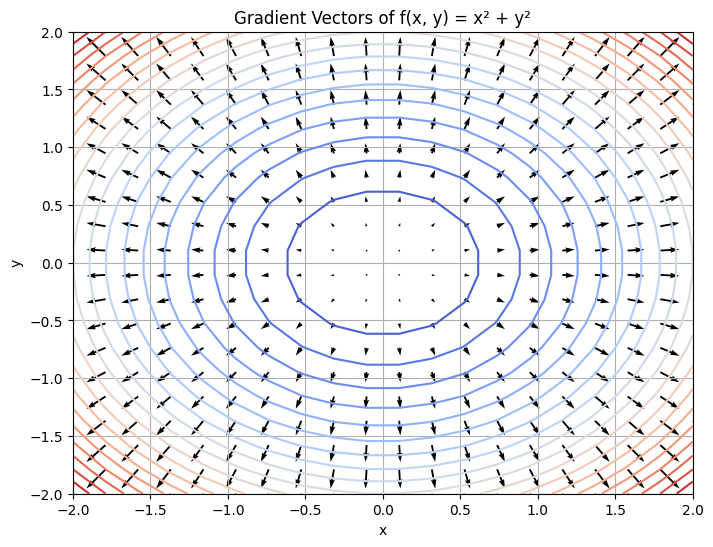

In [12]:
# Plot contour map
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='coolwarm')

# Plot gradient vectors (arrows)
plt.quiver(X, Y, df_dx, df_dy, color='black')
plt.title('Gradient Vectors of f(x, y) = x² + y²')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

##Understanding the Graph
- The arrows point outward from the origin (0,0).
- That makes sense because the function
$$
f(x, y) = x^2 + y^2
$$ increases the further you go from the origin.

- The farther you go, the longer the arrows (gradient gets bigger).



#Section 5: Gradient Descent Logic

##Definition:
  - Gradient Descent is one of the most fundamental optimization techniques used in Machine Learning to minimize loss functions and find the best parameters.

##Intuition: What Is Gradient Descent?

  - Imagine you're at the top of a hill and you want to get to the bottom — but it’s dark, and you can only take steps in the steepest downward direction.  
  That’s exactly what **gradient descent** does!

##The Formula

For a function \( f(\theta) \), the update rule is:

$$
\theta = \theta - \alpha \cdot \nabla f(\theta)
$$

Where:

- θ = the parameters (weights) we are trying to learn  
- α = learning rate (step size)  
- ∇.f(θ) = gradient of the loss function at point θ  

##Example:
$$
f(x) = x^2 \quad \Rightarrow \quad f'(x) = 2x
$$


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
f = lambda x: x**2
df = lambda x: 2*x

In [14]:
# Starting point
x = 5
alpha = 0.1
x_vals = [x]
y_vals = [f(x)]

In [15]:
# Gradient Descent loop
for _ in range(25):
    grad = df(x)
    x = x - alpha * grad
    x_vals.append(x)
    y_vals.append(f(x))

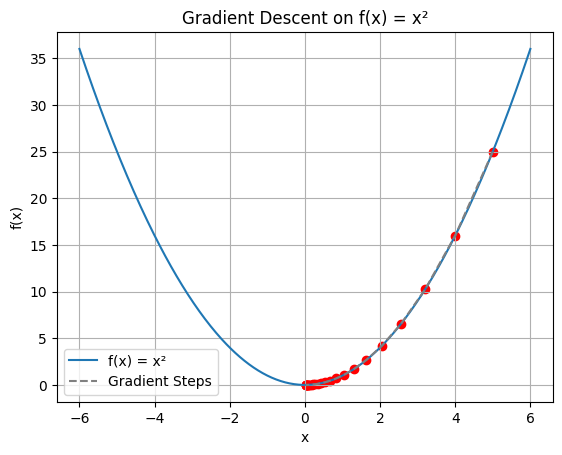

In [16]:
# Plot
x_range = np.linspace(-6, 6, 400)
plt.plot(x_range, f(x_range), label="f(x) = x²")
plt.scatter(x_vals, y_vals, color='red')
plt.plot(x_vals, y_vals, '--', color='gray', label="Gradient Steps")
plt.title("Gradient Descent on f(x) = x²")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

##Understanding the Graph
- Blue Curve — The Function f(x)=x^2
  - This is the original function we're trying to minimize.
  - It's a smooth parabola with the lowest point (minimum) at x=0.

- Red Dots — Points Visited
  - Each red dot represents a step taken during the gradient descent process.
  - We started from the right (e.g., x=5) and moved left, heading downhill toward the minimum at x=0.
  - These dots show how the algorithm updates the value of x to reduce the function's output.

- Gray Dashed Line — Path Taken
  - This line connects the red dots to show the trajectory of gradient descent.
  - It represents how the values of x and f(x) change with each update.

# Section 6: Cost Function Minimization

- A **cost function** measures how well a machine learning model is performing.

  - It calculates the **difference between predicted and actual values**.
  - The **lower** the cost, the **better** the model.
  - Example: Mean Squared Error (MSE)

- One common cost function is **Mean Squared Error**:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$
Where:

  - hθ(x) = predicted value  
  - \\( y \\) = actual value  
  - \\( m \\) = number of training examples  

**Intuition**
  - Squaring the error emphasizes larger mistakes.  
  - Averaging gives a single number to evaluate the model.  
  - A good model should aim to **minimize** the cost function.


In [18]:
#Let’s implement and visualize the cost function for a simple linear regression:f(x)=wx+b and We'll compute MSE and visualize the cost for different values of w and b.
import numpy as np
import matplotlib.pyplot as plt

# Data (1D)  (y=2x)
x = np.array([1, 2, 3, 4])
y = np.array([2, 4, 6, 8])

In [20]:
# Creating a grid of weights (w) and biases (b)
w_vals = np.linspace(0, 4, 100)
b_vals = np.linspace(-2, 2, 100)
W, B = np.meshgrid(w_vals, b_vals)

# Initialize the cost (MSE) matrix
Z = np.zeros_like(W)

# Compute the cost for each (w, b) pair
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w = W[i, j]
        b = B[i, j]
        preds = w * x + b
        Z[i, j] = np.mean((preds - y) ** 2)

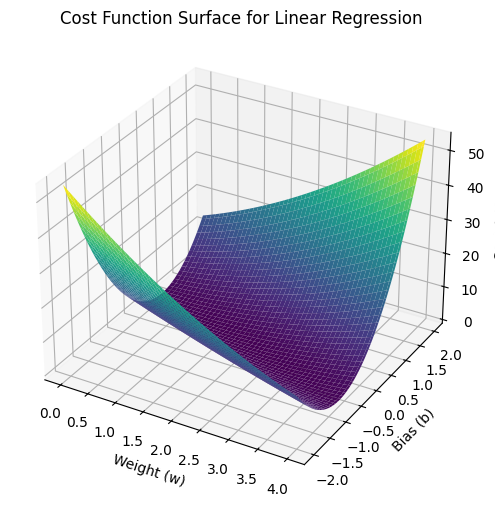

In [21]:
# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z.T, cmap='viridis')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost (MSE)')
ax.set_title('Cost Function Surface for Linear Regression')
plt.show()

##Understanding the Graph
###Axes of the Cost Surface

- **X-axis (Weight `w`)**: Represents different possible values of the slope.
- **Y-axis (Bias `b`)**: Represents different possible values of the intercept.
- **Z-axis (Cost `MSE`)**: Represents the error between predicted and actual values for each `(w, b)` pair.


###What the Surface Tells Us

- Each point on the surface corresponds to a **specific combination** of weight and bias.
- The **height (Z-value)** is the cost (error) the model makes for that combination.
- A **low point** on the surface = model is predicting well → Good parameters.
- A **high point** = model is predicting poorly → Bad parameters.

###The Bowl Shape

- The surface forms a **bowl-like (paraboloid)** shape because MSE is a quadratic function.
- The **bottom of the bowl** is the **global minimum** — the best values of `w` and `b` that minimize the cost.

**This is exactly what gradient descent tries to find!**


#Section 7: Backpropagation (Theory + Mini-Demo)

##**Why Do we need BackPropagation?**

- Think of a neural network like a **layered cake** — each layer processes the input and passes it on.

- When the model makes a mistake (i.e., high loss), we need to adjust **all layers** — but **how much should each layer change?**

- That’s where **backpropagation** comes in — it tells us how much **each weight** in each layer contributed to the error and how to **adjust** them.

##How Does Backpropagation Work?

### 1. **Forward Pass**
- Feed the input through the network
- Compute the **predicted output**

### 2. **Loss Calculation**
- Compare prediction with actual output  
- Compute the **loss (error)**

### 3. **Backward Pass (Backpropagation)**
Starting from the **last layer**, go backward to:
- Find **how much each neuron contributed** to the error  
- Decide the **direction** to update weights (increase or decrease)  
- Determine the **amount to change** (gradient)

### 4. **Weight Update**
- Use the computed gradients to update weights  
- Usually done using **gradient descent**

##Uses Chain Rule!

- Backprop uses the **chain rule** from calculus to compute how the loss depends on earlier weights.

- If:

  - Loss → depends on Prediction  
  - Prediction → depends on Weights  
  - Then:
      
      ∂Loss/∂Weights = ∂Loss/∂Prediction × ∂Prediction/∂Weights

##Think of It Like Dominoes

When one domino (layer) falls, it affects the next.  
Backpropagation tells us:

- **How strong** that effect was  
- How to **adjust each domino (weight)** to reduce future errors

##What Happens Next?

- Once we know the **gradient** (slope) for each weight:  
  → We **update the weight** in the **opposite direction** of the slope  
- This is **gradient descent**  
- Repeat over many **data points and epochs**

The model **gradually improves** over time!

---

##Summary in One Line

> **Backpropagation** = Smart way to calculate how wrong the model is, **layer by layer**, and **fix it using gradients** (via the chain rule).


In [25]:
import numpy as np

# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  #range btw 0 to 1

# Derivative of sigmoid
def sigmoid_deriv(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [28]:
# Forward pass
# input
x = 0.5
# weight
w = 0.7
# bias
b = 0.1
# expected output
y_true = 1.0

# Forward
z = w * x + b
a = sigmoid(z)
loss = 0.5 * (a - y_true)**2

# Backward (manual gradients)
dL_da = a - y_true           # Derivative of loss w.r.t output
da_dz = sigmoid_deriv(z)     # Derivative of output w.r.t z
dz_dw = x                    # Derivative of z w.r.t weight


In [29]:
# Gradient w.r.t weight
# chain rule
dL_dw = dL_da * da_dz * dz_dw

print("Loss:", loss)
print("Gradient w.r.t w:", dL_dw)

Loss: 0.07580090306982433
Gradient w.r.t w: -0.046287005383216756


**What Does it mean**
- Loss (~0.075): The current error between prediction and true value.

- Gradient w.r.t w (~ -0.046):

  - The weight w should be increased slightly (since gradient is negative) to reduce the loss.
  - We use this value in gradient descent to update weights.

#Final Summary: Calculus for AI/ML

This notebook covered key **Calculus concepts** that form the mathematical foundation of **optimization**, **learning dynamics**, and **gradient-based algorithms** in machine learning.  
Concepts were connected to **code** using **NumPy** and **visualizations** to build deep intuition.

---

###  Key Concepts Covered

- **Derivatives & Slopes**: Instantaneous rate of change for single-variable and multivariable functions  
- **Chain Rule**: Fundamental for computing gradients through composed functions (used in neural networks)  
- **Partial Derivatives**: Measuring how a function changes w.r.t one variable at a time  
- **Gradient Vectors**: Direction and rate of steepest ascent  
- **Contour Plots & Surface Plots**: Visualizing functions and gradient directions in 2D/3D  
- **Hessian Matrix** *(Optional)*: Second-order partial derivatives capturing curvature  
- **Gradient Descent**: Optimization logic behind model training

---

###  From-Scratch ML Implementations

 - Manual Gradient Descent for a simple cost function  
 - Logistic Regression Gradient derived step-by-step  
 - Backpropagation Logic with a single neuron example  
 - Visualization of MSE Loss Surface for linear models  
 - Understanding Chain Rule via composed functions

---

###  Applications to Machine Learning

- **Gradient Descent** → Used in training most ML models (linear regression, deep learning, etc.)  
- **Backpropagation** → Efficient gradient computation in neural networks  
- **Loss Minimization** → Calculus-driven optimization of cost functions  
- **Multivariable Derivatives** → Crucial in models with many features and weights  
- **Chain Rule** → Backbone of neural network training
